# Data Augmentation

In [9]:
import os

# needed to get the path right
os.chdir("..")

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

/Users/jh/ai/courses/stanford/3-ML_RL


In [98]:
from constants import TRAIN_DIR
from utils.dataloader import SimpleDataLoader


simple_data_loader = SimpleDataLoader(
    images_path=os.path.join(TRAIN_DIR, "images"),
    mask_path=os.path.join(TRAIN_DIR, "masks"),
    size=10
)

train_data = simple_data_loader.get_images_masks()
train_images = train_data["images"]
train_masks = train_data["masks"]

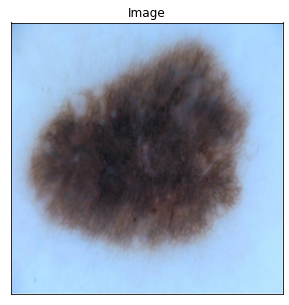

In [99]:
from utils.helper import Visualisation

index = 0

Visualisation().plot_images(image=train_images[index].squeeze())

## Advanced Augmentation

In [93]:
from utils.augmentation import DataAugmentation

index = 2

augmented_data = DataAugmentation().apply_advanced(image=train_images[2], mask=train_masks[2])
augmented_image = augmented_data["image"]
augmented_mask = augmented_data["mask"]

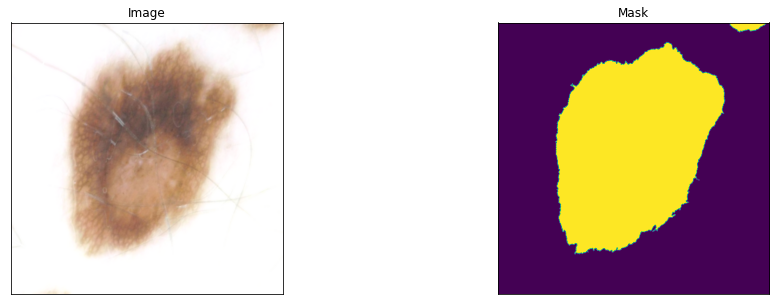

In [94]:
Visualisation().plot_images(image=augmented_image.squeeze(), mask=augmented_mask.squeeze())

## Hair Augmentation

In [95]:
from utils.augmentation import AdvancedHairAugmentation

index = 0

augmented_image = AdvancedHairAugmentation().apply(train_images[index])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


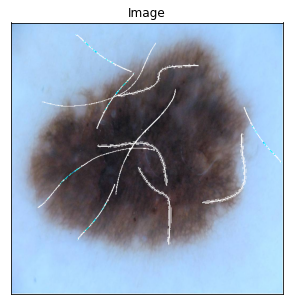

In [96]:
Visualisation().plot_images(image=augmented_image.squeeze())